In [1]:
import pandas as pd
print("Pandas Version: {}".format(pd.__version__))
import numpy as np

%matplotlib inline

Pandas Version: 1.0.5


In [2]:
google = pd.read_csv('strata_data/data/goog.csv', index_col='Date', parse_dates=True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


In [3]:
type(google)

pandas.core.frame.DataFrame

In [4]:
google.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-11,301.93,301.93,296.72,300.25,NaN
2010-01-12,298.74,298.78,293.71,294.94,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN


In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  194 non-null    float64
dtypes: float64(5)
memory usage: 58.9 KB


In [6]:
google['Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
               ...  
2014-12-24    530.51
2014-12-26    528.77
2014-12-29    532.19
2014-12-30    528.09
2014-12-31    531.25
Name: Open, Length: 1257, dtype: float64

In [7]:
google['Open'].iloc[10:20]

Date
2010-01-19    290.45
2010-01-20    292.70
2010-01-21    291.43
2010-01-22    281.97
2010-01-25    273.02
2010-01-26    268.72
2010-01-27    270.36
2010-01-28    271.97
2010-01-29    268.98
2010-02-01    267.03
Name: Open, dtype: float64

In [8]:
google.loc['2010-01-04':'2010-01-08','Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

In [9]:
# Filtering by conditional
google_up = google[ google['Close'] > google['Open'] ]
google_up.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN
2010-01-19,290.45,294.91,287.86,293.52,NaN
2010-01-26,268.72,274.53,267.88,270.94,NaN


In [10]:
google_filtered = google[pd.isnull(google['Volume'])==False]
google_filtered.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,564.86,565.40,550.50,556.58,3826676.0
2014-03-28,558.94,566.03,558.33,559.51,2258918.0
2014-03-31,564.63,566.93,555.87,556.70,1942277.0
2014-04-01,559.57,568.18,558.44,566.88,2182626.0
2014-04-02,282.43,571.83,561.44,566.98,2088804.0


In [11]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.940000e+02
mean,375.275593,378.450247,372.132474,375.327064,1.937264e+06
std,115.684354,116.288827,114.935742,115.664301,9.842775e+05
min,218.940000,220.920000,216.600000,217.820000,7.040350e+05
25%,285.790000,288.760000,283.060000,285.450000,1.338451e+06
50%,318.330000,320.800000,315.180000,317.260000,1.684634e+06
75%,452.540000,456.020000,449.740000,452.830000,2.164369e+06
max,612.790000,613.830000,608.690000,609.470000,6.795393e+06


In [12]:
google['Return'] = google['Close'].pct_change()
google['Return'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004408
2010-01-06   -0.025186
2010-01-07   -0.023303
2010-01-08    0.013345
Name: Return, dtype: float64

In [13]:
google['LogReturn'] = np.log(1 + google['Return'])
google['LogReturn'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004418
2010-01-06   -0.025509
2010-01-07   -0.023578
2010-01-08    0.013256
Name: LogReturn, dtype: float64

In [14]:
window_size = 252
google['Volatility'] = google['LogReturn'].rolling(window_size).std() * np.sqrt(window_size)
google['Volatility'].iloc[window_size-5:window_size+5]

Date
2010-12-28         NaN
2010-12-29         NaN
2010-12-30         NaN
2010-12-31         NaN
2011-01-03         NaN
2011-01-04    0.278561
2011-01-05    0.278770
2011-01-06    0.277694
2011-01-07    0.276720
2011-01-10    0.276432
Name: Volatility, dtype: float64

In [15]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1257 non-null   float64
 1   High        1257 non-null   float64
 2   Low         1257 non-null   float64
 3   Close       1257 non-null   float64
 4   Volume      194 non-null    float64
 5   Return      1256 non-null   float64
 6   LogReturn   1256 non-null   float64
 7   Volatility  1005 non-null   float64
dtypes: float64(8)
memory usage: 128.4 KB


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

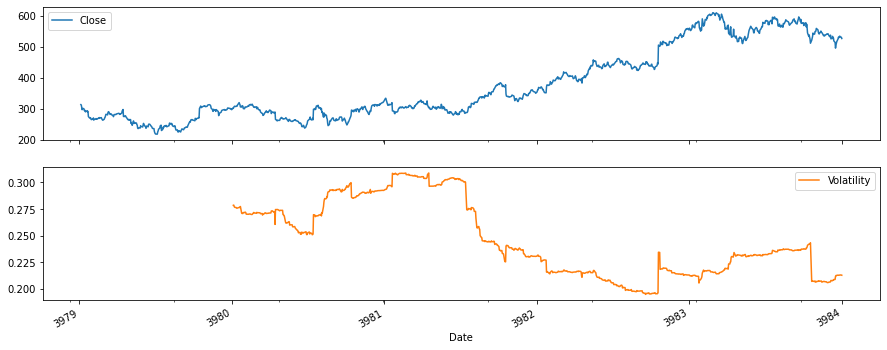

In [16]:
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

In [17]:
# Numerical computing
import numpy as np

# Draw pictures!
import matplotlib.pyplot as plt
%matplotlib inline

# Python people are weird!
import pandas as pd

# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

# Check version number
pd.__version__


'1.0.5'

In [18]:
file   = "strata_data/data/exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']

print( "\n" )
print( series )

print( "\n" )
print( type( series ) )



0          gamma Cep b
1          HD 114762 b
2       PSR B1257+12 B
3       PSR B1257+12 A
             ...      
1638         WASP-89 b
1639         HD 1666 b
1640        HD 95127 b
1641      Kepler-432 c
Name: NAME, Length: 1642, dtype: object


<class 'pandas.core.series.Series'>


In [19]:
new_list = [5, 10, 15, 20, 25]
pd.Series(new_list)

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [20]:
new_dictionary = {'b': 100, 'a': 200.0, 'd':450, 'c':700}
pd.Series(new_dictionary)

b    100.0
a    200.0
d    450.0
c    700.0
dtype: float64

In [21]:
from collections import OrderedDict
od = OrderedDict([('b', 100), ('a',200), ('d',450), ('c',700)])
pd.Series(od)


b    100
a    200
d    450
c    700
dtype: int64

In [22]:
# Example: Creating a Series from a NumPy array

array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

print( "\n" )
print( array1 )
print( type(array1) )

print( "\n" )
print( series1 )
print( type(series1) )



[10. 20. 30. 40. 50.]
<class 'numpy.ndarray'>


0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
<class 'pandas.core.series.Series'>


In [23]:
# The default Index is just a sequence of integers:
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

series1.index


RangeIndex(start=0, stop=5, step=1)

In [24]:
print(series1.iloc[0]) # positional indexing

10.0


In [25]:
# The Index can be set to a sequence of labels:

index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)


In [26]:
# index labels used for indexing
series2.loc['b']

20.0

In [27]:
series2.loc['a']

a    10.0
a    50.0
dtype: float64

In [28]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


In [29]:
series1.iloc[1:3]

1    20.0
2    30.0
dtype: float64

In [30]:
print(series2.iloc[1:2])
print("\n")
print(series2.loc['b': 'c'])

b    20.0
dtype: float64


b    20.0
c    30.0
dtype: float64


In [31]:
series2.iloc[-1:] #slice from end

a    50.0
dtype: float64

In [32]:
series2.iloc[:-3] #slice from beginning

a    10.0
b    20.0
dtype: float64

In [33]:
# Example: slice with labels, but with integer step size
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

In [34]:
# Arithmetic with Series is as with numpy arrays
print(series1)

series2 = series1 * 2 
print(series2)

series3 = series2 * 3
print(series3)

0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
0     20.0
1     40.0
2     60.0
3     80.0
4    100.0
dtype: float64
0     60.0
1    120.0
2    180.0
3    240.0
4    300.0
dtype: float64


In [35]:
# numpy ufuncs can be applied elementwise to Series

series_2pi = pd.Series( np.linspace(-1*np.pi, +1*np.pi, 100) )
series_2pi


0    -3.141593
1    -3.078126
2    -3.014660
3    -2.951193
        ...   
96    2.951193
97    3.014660
98    3.078126
99    3.141593
Length: 100, dtype: float64

In [36]:
series_sin = np.sin( series_2pi )
print( series_sin )
print( type( series_sin ) )

0    -1.224647e-16
1    -6.342392e-02
2    -1.265925e-01
3    -1.892512e-01
          ...     
96    1.892512e-01
97    1.265925e-01
98    6.342392e-02
99    1.224647e-16
Length: 100, dtype: float64
<class 'pandas.core.series.Series'>


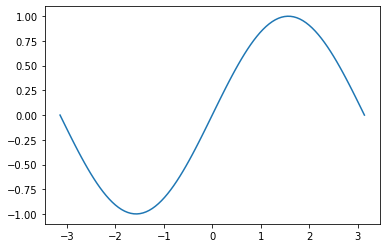

In [37]:
plt.plot(series_2pi, series_sin)

In [38]:
# You can add two series

series1 = pd.Series([1,2,3,4,5])
print(series1)

series2 = pd.Series([10,20,30,40,50])
print(series2)

series3 = series1 + series2
print(series3)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    10
1    20
2    30
3    40
4    50
dtype: int64
0    11
1    22
2    33
3    44
4    55
dtype: int64


In [39]:
# Even better when you assign labels to your data!

series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


In [40]:
(series1 + series2).mean()

24.0

In [41]:
# Contrast how NumPy and Pandas handle NaN:

print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )

Pandas mean:  1.5
Numpy mean:   nan


In [42]:
# Creating a DataFrame from a file read:

file    = "strata_data/data/exoplanets.csv"
df_file = pd.read_csv(file)
df_file

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [43]:
dictionary = {'a':[1,2,3,4,5,6,7,8,9,10],
              'b':np.linspace(0,np.pi,10),
              'c':0.0,
              'd':["a","b","c","a","b","c","a","b","c","a"]}

df_dict = pd.DataFrame(dictionary)
df_dict

,a,b,c,d
0,1,0.000000,0.0,a
1,2,0.349066,0.0,b
2,3,0.698132,0.0,c
3,4,1.047198,0.0,a
...,...,...,...,...
6,7,2.094395,0.0,a
7,8,2.443461,0.0,b
8,9,2.792527,0.0,c
9,10,3.141593,0.0,a


In [44]:
df_dict.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [45]:
df_dict.index

RangeIndex(start=0, stop=10, step=1)

In [46]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     int64  
 1   b       10 non-null     float64
 2   c       10 non-null     float64
 3   d       10 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [47]:
df_grades = pd.DataFrame({'Alice' : [1,2,3,4,5], 
                         'Bob':np.random.random(5), 
                         'Chuck' : np.random.random(5)},
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.561375,0.783374
Feb,2,0.559281,0.888651
Mar,3,0.833708,0.952166
Apr,4,0.323096,0.930755
May,5,0.080542,0.177999


In [48]:
series_a = df_grades['Alice']

print( series_a )
print( type(series_a) )

Jan    1
Feb    2
Mar    3
Apr    4
May    5
Name: Alice, dtype: int64
<class 'pandas.core.series.Series'>


In [49]:
df_grades['Alice'].iloc[1]

2

In [50]:
df_grades.loc['Jan','Alice']

1

In [51]:
for key, value in df_grades['Bob'].iteritems():
    print('Key:', '%s' % key, ', Value:', '%s' % value)



Key: Jan , Value: 0.561375455038912
Key: Feb , Value: 0.5592807050463807
Key: Mar , Value: 0.8337082497607103
Key: Apr , Value: 0.32309568578207615
Key: May , Value: 0.0805424519255441


In [52]:
for index, row in df_grades.iterrows():
    print('Index:', '%s' % index, ', Row:', '%s' % row['Chuck'])

Index: Jan , Row: 0.7833744266265137
Index: Feb , Row: 0.8886511202426317
Index: Mar , Row: 0.9521664734305482
Index: Apr , Row: 0.9307554480626236
Index: May , Row: 0.17799883138139572


In [53]:
# Extract a column as a new DataFrame
df_col = df_grades[['Alice']]
print( df_col, "\n", type(df_col) )

     Alice
Jan      1
Feb      2
Mar      3
Apr      4
May      5 
 <class 'pandas.core.frame.DataFrame'>


In [54]:
# Extract a row as a new DataFrame
df_row = df_grades.loc['Jan':'Jan']
print( df_row, "\n", type(df_row) )

     Alice       Bob     Chuck
Jan      1  0.561375  0.783374 
 <class 'pandas.core.frame.DataFrame'>


In [55]:
df_grades.loc['Jan':'Mar', 'Alice']

Jan    1
Feb    2
Mar    3
Name: Alice, dtype: int64

In [56]:
df_grades.loc[:, 'Alice':'Bob']

,Alice,Bob
Jan,1,0.561375
Feb,2,0.559281
Mar,3,0.833708
Apr,4,0.323096
May,5,0.080542


In [57]:
# For extracting row and column ranges
df_grades.loc['Mar':'Apr', 'Bob':'Chuck']

,Bob,Chuck
Mar,0.833708,0.952166
Apr,0.323096,0.930755


In [58]:
# Boolean masks work too
df_grades.loc[df_grades['Bob'] < .5]

,Alice,Bob,Chuck
Apr,4,0.323096,0.930755
May,5,0.080542,0.177999


In [59]:
# Pandas DataFrames can be cast to other types

my_list  = list(df_grades['Alice'])
print( my_list, type(my_list) )

my_array = np.array(df_grades['Alice'])
print( my_array, type(my_array) )

[1, 2, 3, 4, 5] <class 'list'>
[1 2 3 4 5] <class 'numpy.ndarray'>


In [60]:
import matplotlib.pyplot as plt

In [61]:
# Print a list of all read_* methods in pandas

print("".join(["pd.%s\n" % reader 
               for reader in dir(pd) 
               if reader.startswith('read_')]))

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table



In [62]:
print("".join(["pd.DataFrame.%s\n" % reader 
               for reader in dir(pd.DataFrame) 
               if reader.startswith('to_')]))

pd.DataFrame.to_clipboard
pd.DataFrame.to_csv
pd.DataFrame.to_dict
pd.DataFrame.to_excel
pd.DataFrame.to_feather
pd.DataFrame.to_gbq
pd.DataFrame.to_hdf
pd.DataFrame.to_html
pd.DataFrame.to_json
pd.DataFrame.to_latex
pd.DataFrame.to_markdown
pd.DataFrame.to_numpy
pd.DataFrame.to_parquet
pd.DataFrame.to_period
pd.DataFrame.to_pickle
pd.DataFrame.to_records
pd.DataFrame.to_sql
pd.DataFrame.to_stata
pd.DataFrame.to_string
pd.DataFrame.to_timestamp
pd.DataFrame.to_xarray

